## 5 Little Known Pandas Features

### Getting the data


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Describe also non-numeric values

In [4]:
# Generate descriptive statistics
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# Include also non-numeric values
df.describe(include="all")

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## 2. Count number of distinct elements


In [6]:
# 0=rows [Default], 1=headers
df.nunique(axis=0)

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

### 3. Use plotly for pandas charts


<AxesSubplot:xlabel='day'>

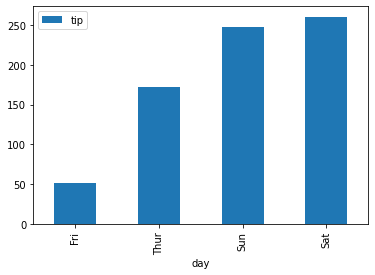

In [7]:
# By default, pandas is using `matplotlib`
df.groupby(by=["day"]).sum()[["tip"]].sort_values(by=["tip"]).plot(kind="bar")

In [8]:
# Use `plotly` for the plotting backend
pd.options.plotting.backend = "plotly"
df.groupby(by=["day"]).sum()[["tip"]].sort_values(by=["tip"]).plot(kind="bar")

### 4. Pandas & Numpy Where function


Pandas Where - Replace values if the condition is False


| where(condition, value if condition is false)

In [9]:
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df["tip"].where(df["tip"] > 2)


0       NaN
1       NaN
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240     NaN
241     NaN
242     NaN
243    3.00
Name: tip, Length: 244, dtype: float64

In [11]:
avg = df["tip"].mean()
avg

2.9982786885245902

In [12]:
df_copy = df.copy()
df_copy["tip"] = df["tip"].where(df["tip"] >= avg, "below average")
df_copy.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,below average,Female,No,Sun,Dinner,2
1,10.34,below average,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
# You can also use `inplace=True` to apply the changes to the dataframe directly
# df['tip'].where(df['tip'] >= avg, "below average", inplace=True)

### Numpy Where - Similar to an Excel If/Else Statement
 

| np.where(condition, value if condition is true, value if condition is false)


In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
import numpy as np

df["is_weekend"] = np.where(df["day"].isin(["Sat", "Sun"]), True, False)
df.head()

,total_bill,tip,sex,smoker,day,time,size,is_weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


### 5. Style your dataframe


In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,is_weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


In [19]:
# Find more options here: https://pandas.pydata.org/docs/user_guide/style.html
def make_pretty(styler):
    styler.set_caption("Tips in USD")
    styler.format({"total_bill": "USD {:.1f}", "tip": "USD {:.1f}", "size": "{} seats"})
    styler.background_gradient(cmap="RdYlGn", subset=["total_bill", "tip"])
    styler.set_table_styles([{"selector": "th.col_heading", "props": [("background-color", "#d3d3d3")]}])
    # styler.hide(subset=["sex", "smoker"], axis=1)
    styler.bar(subset=["size"])

    return styler 

In [20]:
df.head().style.pipe(make_pretty)

,total_bill,tip,sex,smoker,day,time,size,is_weekend
0,USD 17.0,USD 1.0,Female,No,Sun,Dinner,2 seats,True
1,USD 10.3,USD 1.7,Male,No,Sun,Dinner,3 seats,True
2,USD 21.0,USD 3.5,Male,No,Sun,Dinner,3 seats,True
3,USD 23.7,USD 3.3,Male,No,Sun,Dinner,2 seats,True
4,USD 24.6,USD 3.6,Female,No,Sun,Dinner,4 seats,True


In [21]:
# When exporting to Excel not all styles will be kept
df.head().style.pipe(make_pretty).to_excel("styled_output.xlsx", engine="openpyxl", index=False)

### Style your Excel export


If you want to style your dataframes for your Excel exports, check out the following packages:
👉 https://github.com/DeepSpace2/StyleFrame

In [23]:
!pip install styleframe --quiet

In [24]:
# !pip install styleframe --quiet
from styleframe import StyleFrame, Styler, utils

# Create StyleFrame object that wrap our DataFrame and assign default style.
default_style = Styler(font=utils.fonts.aharoni, font_size=14)
sf = StyleFrame(df, styler_obj=default_style)

# Style the headers of the table
header_style = Styler(bold=True, font_size=18)
sf.apply_headers_style(styler_obj=header_style)

# Set the background color to green where is_weekend marked as 'TRUE'
weekend_style = Styler(bg_color="#77DD76", font_color=utils.colors.white)
sf.apply_style_by_indexes(
    indexes_to_style=sf[sf["is_weekend"] == True],
    cols_to_style="is_weekend",
    styler_obj=weekend_style,
    overwrite_default_style=False,
)

# Set the background color to red where is_weekend marked as 'FALSE'
weekday_style = Styler(bg_color="#FF6962", font_color=utils.colors.white)
sf.apply_style_by_indexes(
    indexes_to_style=sf[sf["is_weekend"] == False],
    cols_to_style="is_weekend",
    styler_obj=weekday_style,
    overwrite_default_style=False,
)

# Change the columns width and the rows height
sf.set_column_width(columns=sf.columns, width=20)
sf.set_row_height(rows=sf.row_indexes, height=25)

sf.to_excel(
    "styled_output_using_styleframe.xlsx",
    # Add filters in row 0 to each column.
    row_to_add_filters=0,
    # Freeze the columns before column 'A' (=None) and rows above '2' (=1).
    columns_and_rows_to_freeze="A2",
).save()